In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("sentiment_train", delimiter = '\t')

In [3]:
df.head() # first five records of loaded dataset 

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [4]:
# first 5 positive sentiments
pd.set_option('max_colwidth', 800)
df[df.sentiment==1][0:5]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [5]:
# first 5 negative sentiments
df[df.sentiment==0][0:5]

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


In [6]:
# Exploring the dataset
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB
None
(6918, 2)


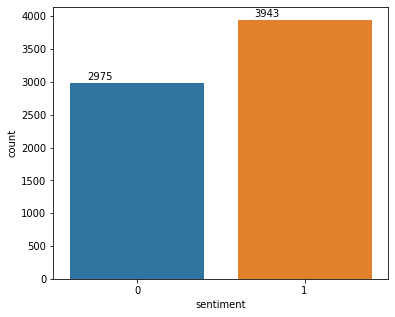

In [7]:
# visualization 

plt.figure(figsize=(6,5))
ax = sns.countplot(x = 'sentiment', data = df)

#annotate
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

# Text Preprocessing

In [8]:
# creating count vectors for sentiment_train dataset

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer() # initialize the countvector

feature_vector = count_vectorizer.fit(df.text)  # create the dictionary from the corpus

features = feature_vector.get_feature_names()  # get the feature names

print("Total number of features:", len(features))

Total number of features: 2132


In [9]:
import random
random.sample(features,10)

['targeted',
 'badness',
 'cannot',
 'shit',
 'um',
 'book',
 'lame',
 '50',
 'cute',
 'nd']

In [10]:
df_features= count_vectorizer.transform(df.text)
type(df_features)

scipy.sparse._csr.csr_matrix

In [11]:
df_features.shape

(6918, 2132)

In [12]:
df_features.getnnz()  #getnnz() - how many total sparse metrix / count of zero

65398

In [13]:
print("Density of matrix:", df_features.getnnz()*100/(df_features.shape[0]*df_features.shape[1]))

Density of matrix: 0.4434010415225908


In [14]:
# displaying documents vector

df_df = pd.DataFrame(df_features.todense())  # converting the matrix to a dataframe

df_df.columns = features  # setting the column names to the features i.e. words

In [15]:
df_df.iloc[0:1, 150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,1,0,0,0,0,0


Text(0, 0.5, 'Density')

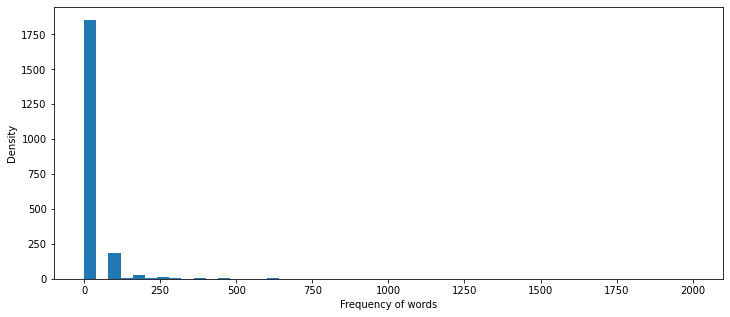

In [16]:
# removing the low frequency words

# summing up the occurances of features column wise

features_counts = np.sum(df_features.toarray(), axis = 0)
features_counts_df = pd.DataFrame(dict(features = features, counts = features_counts))

plt.figure(figsize = (12,5))
plt.hist(features_counts_df.counts, bins = 50, range = (0,2000))
plt.xlabel("Frequency of words")
plt.ylabel("Density")

In [17]:
features_counts_df

,features,counts
0,00,1
1,007,1
2,10,4
3,10pm,1
4,12,1
...,...,...
2127,yuck,1
2128,yuh,1
2129,zach,1
2130,zen,80


In [18]:
print(len(features_counts_df[features_counts_df.counts==1]))

1228


In [19]:
print(len(features_counts_df[features_counts_df.counts==0]))

0


In [20]:
count_vectorizer = CountVectorizer(max_features=1000)
features_vector = count_vectorizer.fit(df.text)
features = features_vector.get_feature_names()
df_features = count_vectorizer.transform(df.text)
features_counts = np.sum(df_features.toarray(), axis = 0)
features_counts = pd.DataFrame(dict(features = features, counts = features_counts))
features_counts.sort_values('counts', ascending = True)[0:50]

,features,counts
652,plausible,1
700,pudding,1
591,outnumbered,1
625,period,1
677,power,1
701,pull,1
588,others,1
702,pup,1
676,potterholic,1
703,purchase,1


In [21]:
count_vectorizer = CountVectorizer(max_features=1000)
features_vector = count_vectorizer.fit(df.text)
features = features_vector.get_feature_names()
df_features = count_vectorizer.transform(df.text)
features_counts = np.sum(df_features.toarray(), axis = 0)
features_counts = pd.DataFrame(dict(features = features, counts = features_counts))
features_counts.sort_values('counts', ascending = False)[0:50]

,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


In [22]:
# Remove Stop words

from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
print("Few Stop Words : ", list(my_stop_words)[0:20])


Few Stop Words :  ['herein', 'seeming', 'cannot', 'nothing', 'ours', 'whereafter', 'could', 'he', 'together', 'very', 'him', 'those', 'towards', 'ever', 'done', 'cant', 'am', 'again', 'some', 'had']


In [23]:
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [24]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['harry', 'potter', 'mountain'])

In [25]:
# creating count vecotrs
count_vectorizer = CountVectorizer(stop_words = my_stop_words, max_features = 1000)
feature_vector = count_vectorizer.fit(df.text)
df_features = count_vectorizer.transform(df.text)
features = feature_vector.get_feature_names()
features_counts = np.sum(df_features.toarray(), axis = 0)
features_counts = pd.DataFrame(dict(features = features, counts = features_counts))
features_counts.sort_values('counts', ascending = False)[0:50]

,features,counts
103,code,2002
141,da,2001
903,vinci,2001
72,brokeback,2000
409,love,1624
38,awesome,1127
437,mission,1094
342,impossible,1093
391,like,974
443,movie,783


In [26]:
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

ModuleNotFoundError: No module named 'nltk'